<h1 style="text-align: center;"><strong>Proyect data science(K-Means)</strong></h1>


<h5>Objectives</h5>
Develop a k-means-based Machine Learning algorithm to analyze sales data from a supermarket. The main objective is to identify customer behavior patterns and segment them into homogeneous groups. This will provide valuable insights for strategic decision-making in marketing, promotions, and inventory management.
<h5>Objetivos</h5>
Crear un algoritmo de Machine Learning basado en k-means para analizar los datos de ventas de un supermercado. El objetivo principal es identificar patrones de comportamiento de los clientes y segmentarlos en grupos homogéneos. Esto proporcionará información valiosa para la toma de decisiones estratégicas en marketing, promociones y gestión de inventario.

<h5>Business Context</h5>
The project is conducted in a supermarket to enhance sales strategies and customer management. Using Data Science and Machine Learning techniques, sales data will be analyzed to identify behavior patterns and segment customers into homogeneous groups. This enables informed decision-making regarding marketing, promotions, and inventory management.
<h5>Contexto comercial </h5>
El proyecto se lleva a cabo en un supermercado con el objetivo de mejorar las estrategias de ventas y la gestión de clientes. Utilizando técnicas de Data Science y Machine Learning, se analizarán los datos de ventas para identificar patrones de comportamiento y segmentar a los clientes en grupos homogéneos. Esto permitirá tomar decisiones informadas sobre marketing, promociones y gestión de inventario.

<h5>Business Problem</h5>
The business problem faced by the supermarket is the need to improve the effectiveness of their sales strategies and maximize customer satisfaction. Currently, they lack a deep understanding of customer behavior patterns and are unable to segment them efficiently. This hinders the ability to personalize offers and optimize inventory management.
<h5>Problema comercial </h5>
El problema comercial que enfrenta el supermercado es la necesidad de mejorar la efectividad de sus estrategias de ventas y maximizar la satisfacción del cliente. Actualmente, carecen de una comprensión profunda de los patrones de comportamiento de los clientes y no pueden segmentarlos de manera eficiente. Esto dificulta la personalización de las ofertas y la optimización de la gestión de inventario.

In [5]:
#Installations
#!pip install missingno
#pip install mysql-connector-python
#!pip install ffmpeg-python

In [6]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpt
import seaborn as sns
from sklearn.datasets import load_wine
from   scipy import stats
import mysql.connector
import missingno as msno
%matplotlib inline
from matplotlib import animation
from IPython.display import HTML
from matplotlib import animation


In [7]:
# Connection to the MySQL database
# Configure the connection parameters
config = {
    'user': 'root',
    'password': '',
    'host': '127.0.0.1',
    'database': 'salessupermarket'
}

# Establish the connection
conn = mysql.connector.connect(**config) #Mediante esta línea de código se establece la conexión con la base de datos utilizando los parámetros de configuración proporcionados.

# Create a cursor object
cursor = conn.cursor()  #Se crea un objeto cursor que se utiliza para ejecutar consultas SQL y recuperar los resultados.

# Execute the SELECT query
query = "SELECT * FROM sales" #Contiene la consulta SELECT que se va a ejecutar en la base de datos. En este caso, la consulta selecciona todos los datos de la tabla "sales".
cursor.execute(query) #Ejecuta la consulta SELECT en la base de datos utilizando el objeto cursor.

# Retrieve the results and convert them into a DataFrame
results = cursor.fetchall() #Almacena los resultados de la consulta ejecutada.
df_sales = pd.DataFrame(results, columns=cursor.column_names) #Crea un DataFrame utilizando los resultados obtenidos de la consulta. Los datos se organizan en columnas utilizando los nombres de columna del cursor.


<h4>Descricpcion de los datos del dataset</h4><br>
Invoice ID = Es un codigo unico de la transaccion realizada (Primary key).<br>
City = Ciudad donde se efectuo la venta es una variable categorica que contiene 3 valores unicos •Yagon •Naypyitaw •Mandalay.<br>
Customer type = Identificador único para cada cliente en el sistema. Pueden ser •Member •Normal.<br>
Gender = Genero del usuario que hizo la compra, •Male •Female.<br>
Product line = Categoria del producto que se vendio. Una variable categorica que puede contener 6 variables unicas •Health and beauty •Electronic accessories •Home and lifestyle •Sports and travel •Food and beverages •Fashion accessories.<br>
Unit price = Vemos el precio de la unidad comprada.<br>
Quantity = Vemos la cantidad comprada (la variable mas importante). Esta variable nos va a permitir ver el volumen de venta por categoria de producto.<br>
Tax 5% = Impuesto de la compra realizada.<br>
Total = Valor total de la venta. <br>
Date = fecha en la que se efectuo la venta.<br>
Time = hora de la venta. <br>
Payment = Forma de pago de la venta. <br>
Cogs = Valor neto de la venta sin contar el impuesto.<br>
Gross margin percentage = Valor constante que representa el porcentaje de gananacia de la venta.<br>
Gross income = Valor que se le suma al neto de la venta. <br>

<h4>Description of the dataset</h4><br>
Invoice ID: Unique code for each transaction made (Primary key).<br>
City: City where the sale was made, a categorical variable with 3 unique values: •Yagon •Naypyitaw •Mandalay.<br>
Customer type: Unique identifier for each customer in the system. Can be •Member •Normal.<br>
Gender: Gender of the user who made the purchase: •Male •Female.<br>
Product line: Category of the sold product. A categorical variable that can contain 6 unique values: •Health and beauty •Electronic accessories •Home and lifestyle •Sports and travel •Food and beverages •Fashion accessories.<br>
Unit price: Price of the purchased unit.<br>
Quantity: Quantity purchased (the most important variable). This variable allows us to see the sales volume by product category.<br>
Tax 5%: Tax of the purchase made.<br>
Total: Total value of the sale.<br>
Date: Date on which the sale was made.<br>
Time: Time of the sale.<br>
Payment: Payment method of the sale.<br>
Cogs: Net value of the sale excluding tax.<br>
Gross margin percentage: Constant value representing the profit percentage of the sale.<br>
Gross income: Value added to the net sale value.

In [8]:
#We convert the column 'date' into date format
#Convertimos la columna date en formato fecha
df_sales['Date'] = pd.to_datetime(df_sales['Date'])

In [9]:
#We add the 'Year' and 'Month' columns
#Agregamos la culumna Year y Month
df_sales['Month'] = df_sales['Date'].dt.month
df_sales

,Invoice ID,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Month
0,750-67-8428,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Ewallet,522.83,4.761905,26.1415,9.1,1
1,226-31-3081,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29,Cash,76.40,4.761905,3.8200,9.6,3
2,631-41-3108,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23,Credit card,324.31,4.761905,16.2155,7.4,3
3,123-19-1176,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33,Ewallet,465.76,4.761905,23.2880,8.4,1
4,373-73-7910,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37,Ewallet,604.17,4.761905,30.2085,5.3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,2019-01-29,13:46,Ewallet,40.35,4.761905,2.0175,6.2,1
996,303-96-2227,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,2019-03-02,17:16,Ewallet,973.80,4.761905,48.6900,4.4,3
997,727-02-1313,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2019-02-09,13:22,Cash,31.84,4.761905,1.5920,7.7,2
998,347-56-2442,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2019-02-22,15:33,Cash,65.82,4.761905,3.2910,4.1,2


<AxesSubplot:>

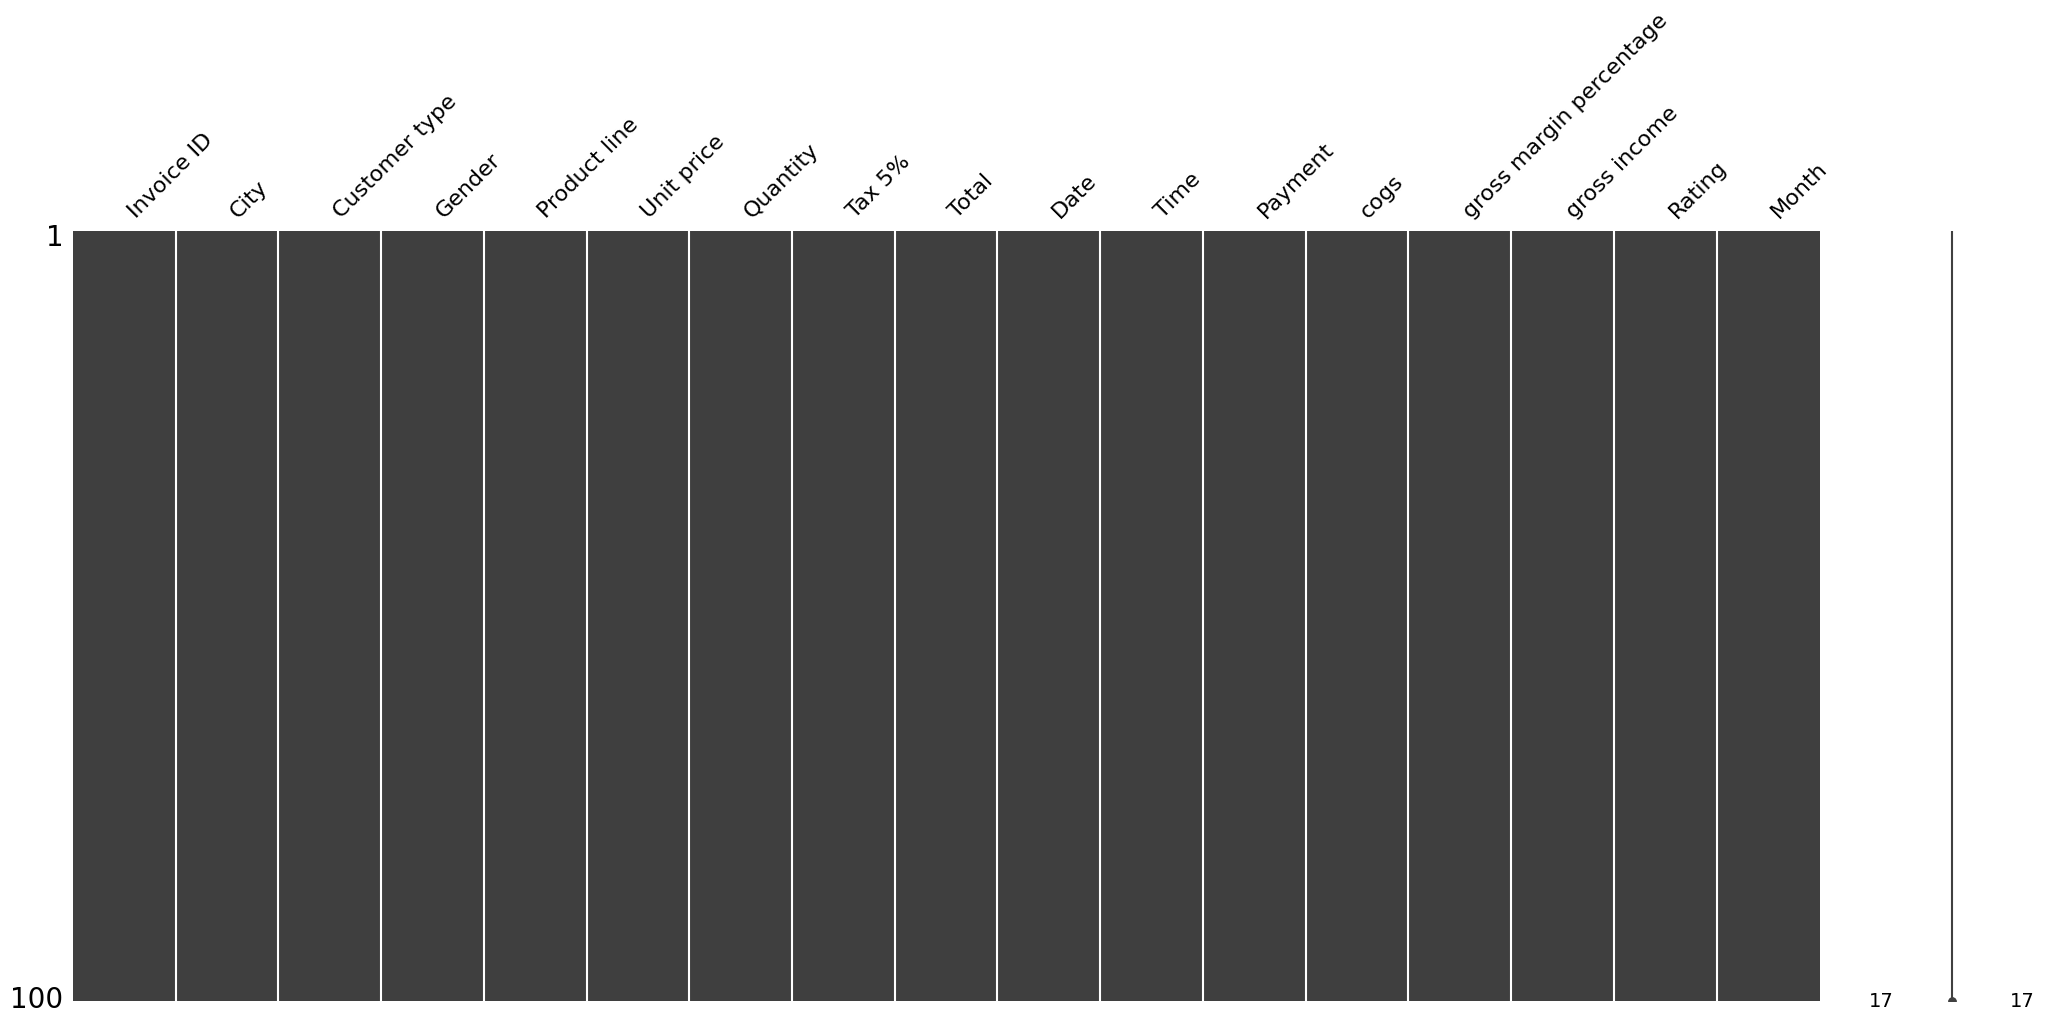

In [10]:
#We use missingno to visualize missing data.
msno.matrix(df_sales.sample(100)) #matrix(): Es una función proporcionada por missingno para crear una matriz de datos 

In this dataframe, we did not detect any missing data, so it is not necessary to choose a method to handle them.

In [11]:
#Another way to calculate the missing values
# Columnas con porcentaje de nulos
pd.set_option('display.max_rows', None)  # or 1000
serie=(df_sales.isnull().sum()/df_sales.shape[0])*100
serie=serie.sort_values(ascending=False)
serie= serie[serie>0]
serie

Series([], dtype: float64)

In [12]:
#We check the dimensions of the dataset
#Vemos las dimensiones del dataset
df_sales.shape 

(1000, 17)

In [13]:
#Now we are going to see all the columns of our dataframe and their data type.
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Invoice ID               1000 non-null   object        
 1   City                     1000 non-null   object        
 2   Customer type            1000 non-null   object        
 3   Gender                   1000 non-null   object        
 4   Product line             1000 non-null   object        
 5   Unit price               1000 non-null   float64       
 6   Quantity                 1000 non-null   int64         
 7   Tax 5%                   1000 non-null   float64       
 8   Total                    1000 non-null   float64       
 9   Date                     1000 non-null   datetime64[ns]
 10  Time                     1000 non-null   object        
 11  Payment                  1000 non-null   object        
 12  cogs                     1000 non-n

In [14]:
#We obtain descrive stadistics from the dataframe.
df_sales.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating,Month
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905,15.379369,6.97270,1.993000
std,26.494628,2.923431,11.708825,245.885335,234.17651,0.000000,11.708825,1.71858,0.835254
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905,0.508500,4.00000,1.000000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905,5.924875,5.50000,1.000000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905,12.088000,7.00000,2.000000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905,22.445250,8.50000,3.000000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905,49.650000,10.00000,3.000000


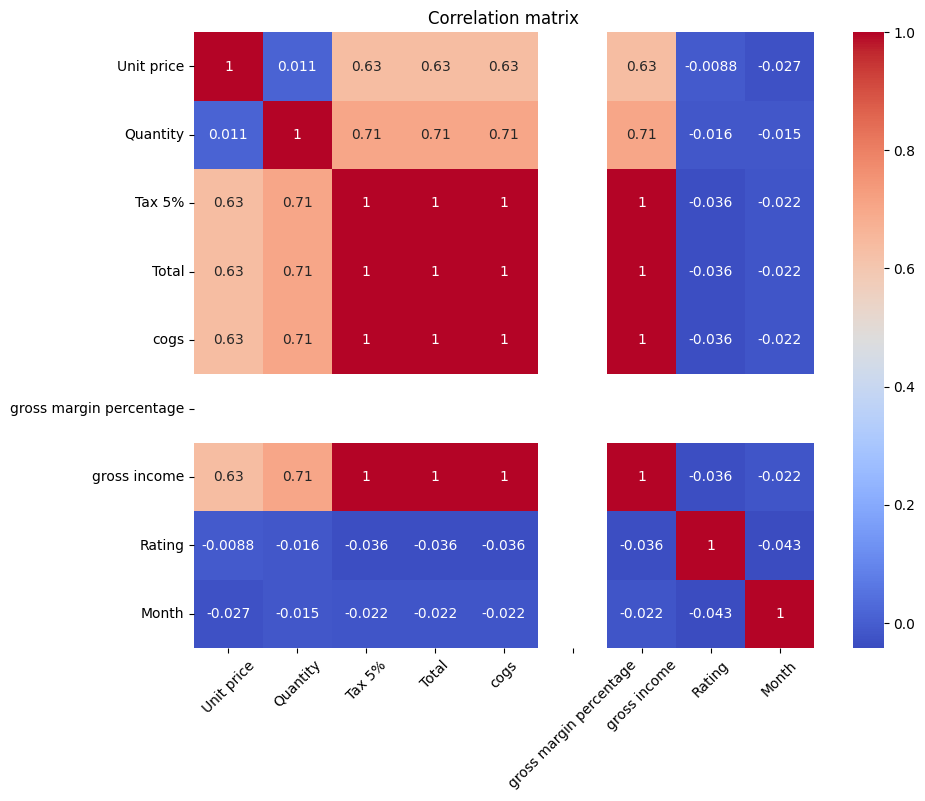

In [15]:
#Correlation matrix
#Calculamos la matriz de correlacion
Correlation_matrix = df_sales.corr()

#Creamos el grafico de mapa de calor (heatmap) de la matriz de correlacion
plt.figure(figsize=(10,8)) #Definimos el tamano del grafico
sns.heatmap(Correlation_matrix, annot=True, cmap='coolwarm') #Llamamos al grafico y lo seteamos nuestro gusto annot(Etiquetas), cmap(colores)

#Configuramos las etiquetas y titulo
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.title('Correlation matrix')

#Mostramos el grafico
plt.show()

We see that the gross margin percentage column is blank because it is a constant

<AxesSubplot:title={'center':'Sales in all time (Per city)'}, xlabel='Date', ylabel='Total sales per city'>

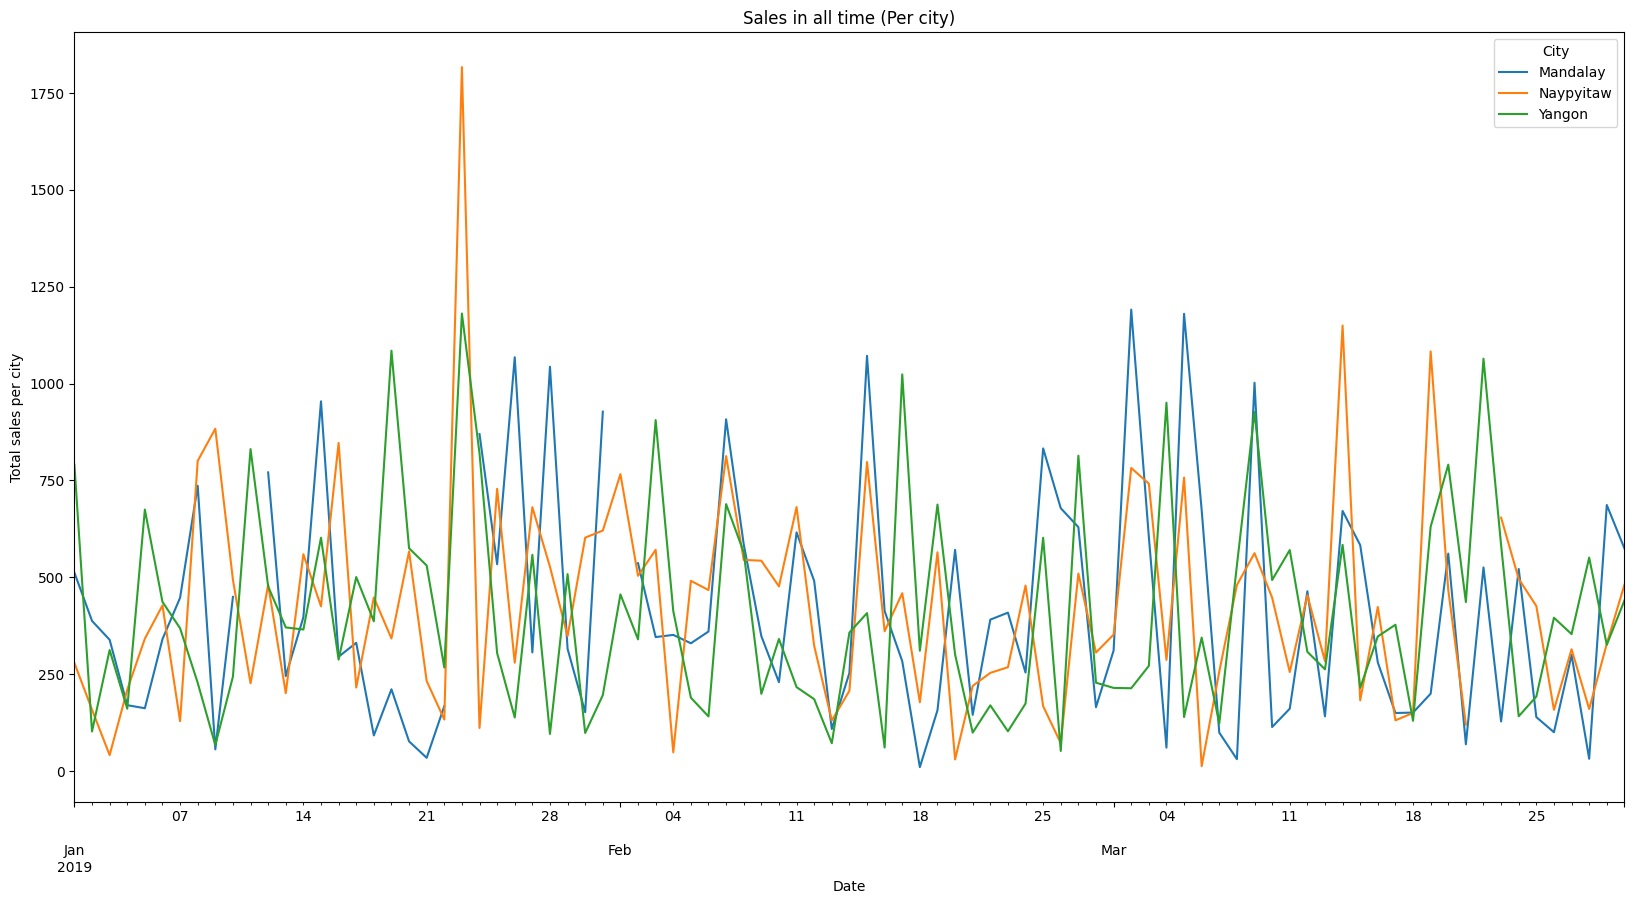

In [16]:
#We plot the sales over time, divided by the three branches to analyze
#Graficamos las ventas a lo largo del tiempo dividiendo por las tres sucursales a analizar

df_group = df_sales.groupby(['Date', 'City'])['Total'].sum().unstack()
#En esta línea, estamos agrupando el DataFrame df_sales por las columnas 'Date' y 'City' y calculando la suma de la columna 'Total'. Luego, utilizamos unstack() para reorganizar los datos de manera que cada valor de 'City' se convierte en una columna separada y 'Date' se convierte en el índice del DataFrame resultante.

df_group = df_group.div(df_group.count(axis=1), axis=0) 
#En esta línea, estamos dividiendo cada fila del DataFrame df_grouped por el número de ciudades, lo que nos da las ventas promedio por ciudad para cada fecha. Esto se logra utilizando el método div() y pasando df_grouped.count(axis=1) como el divisor y axis=0 para realizar la división a lo largo de las filas.

df_group.plot(kind='line', figsize=(20, 10), xlabel='Date', ylabel='Total sales per city', title='Sales in all time (Per city)') 


In [17]:
# We observe a very high peak for the Naypyitaw branch. We will try to identify the reasons behind these values
# Vemos un pico muy alto para la sucursal de Naypyitaw trataremos de identificar a que se deben esos valores 
df_group = df_sales.groupby(['Date', 'City'])['Total'].sum().unstack()
df_group = df_group.div(df_group.count(axis=1), axis=0)
city_name = 'Naypyitaw'
df_Naypyitaw = df_group[df_group.columns[df_group.columns.get_level_values('City') == city_name]]
df_Naypyitaw

City,Naypyitaw
Date,
2019-01-01,279.05500
2019-01-02,158.55000
2019-01-03,41.34200
2019-01-04,209.94750
2019-01-05,341.80650
2019-01-06,427.53200
2019-01-07,128.79300
2019-01-08,800.44300
2019-01-09,883.49450


In [18]:
#We filter the dataframe to verify if there are any erroneous data for that specific date
fecha_especifica = '1/23/2019'  # Fecha específica en formato 'YYYY-MM-DD'
ciudad_especifica = 'Naypyitaw'  # Ciudad específica que deseas filtrar

df_Day_Naypytaw = df_sales[(df_sales['Date'] == fecha_especifica) & (df_sales['City'] == ciudad_especifica)]
df_Day_Naypytaw

,Invoice ID,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Month
82,480-63-2856,Naypyitaw,Normal,Male,Food and beverages,19.25,8,7.7000,161.7000,2019-01-23,18:37,Ewallet,154.00,4.761905,7.7000,6.6,1
90,565-80-5980,Naypyitaw,Member,Female,Home and lifestyle,47.38,4,9.4760,198.9960,2019-01-23,10:25,Cash,189.52,4.761905,9.4760,7.1,1
140,731-81-9469,Naypyitaw,Member,Female,Sports and travel,89.80,10,44.9000,942.9000,2019-01-23,13:00,Credit card,898.00,4.761905,44.9000,5.4,1
181,434-83-9547,Naypyitaw,Member,Male,Food and beverages,38.47,8,15.3880,323.1480,2019-01-23,11:51,Cash,307.76,4.761905,15.3880,7.7,1
421,740-22-2500,Naypyitaw,Normal,Female,Electronic accessories,84.05,3,12.6075,264.7575,2019-01-23,13:29,Cash,252.15,4.761905,12.6075,9.8,1
470,767-05-1286,Naypyitaw,Member,Female,Home and lifestyle,83.77,6,25.1310,527.7510,2019-01-23,12:10,Ewallet,502.62,4.761905,25.1310,5.4,1
600,219-61-4139,Naypyitaw,Normal,Male,Electronic accessories,83.08,1,4.1540,87.2340,2019-01-23,17:16,Ewallet,83.08,4.761905,4.1540,6.4,1
787,790-38-4466,Naypyitaw,Normal,Female,Health and beauty,10.99,5,2.7475,57.6975,2019-01-23,10:18,Credit card,54.95,4.761905,2.7475,9.3,1
816,477-59-2456,Naypyitaw,Normal,Female,Fashion accessories,45.44,7,15.9040,333.9840,2019-01-23,11:15,Cash,318.08,4.761905,15.9040,9.2,1
983,148-41-7930,Naypyitaw,Normal,Male,Health and beauty,99.96,7,34.9860,734.7060,2019-01-23,10:33,Cash,699.72,4.761905,34.9860,6.1,1


Filtramos el dia que vimos que tenia un pico demasiado alto para poder detectar si se trataba de un error, pero esos dias hay compras demasiados elevadas por lo cual a simple vista no podriamos concluir de que sea un error.<br>
We filter the day that we observed had a very high peak to detect if it was an error, but on those days, there are extremely high purchases, so we cannot conclude at first glance that it is an error

Podemos diferenciar un grupo marcado de clientes que mas ventas producen en las tiendas?

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


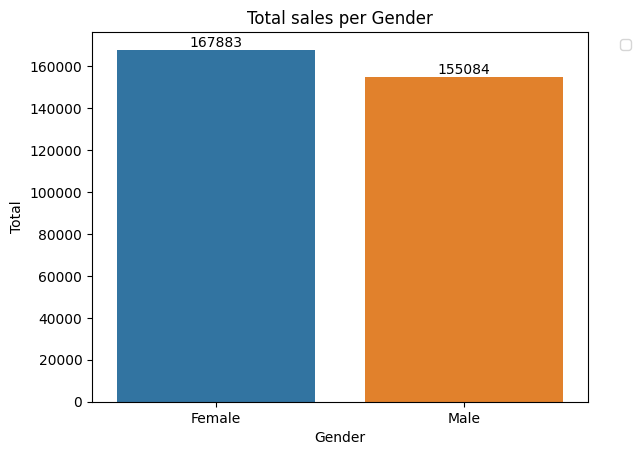

In [19]:
# We look at the total sales by gender
# Vemos las ventas totales por genero

Gender_Sold = df_sales[['Gender','Total']].groupby(by=['Gender']).sum().reset_index()

ax = sns.barplot (x='Gender', y='Total',data=Gender_Sold)
ax.set (xlabel='Gender',ylabel = 'Total')
ax.set_title('Total sales per Gender')

#Agregamos etiquetas a las barras
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}',(p.get_x()+p.get_width()/2, p.get_height()), ha='center', va='bottom')
    
plt.xticks(rotation=0)

#Acomodamos la leyenda
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


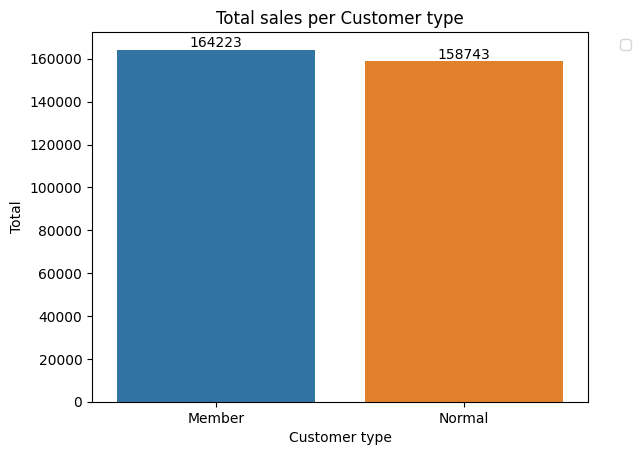

In [20]:
#We observe the total sales by customer type
# Vemos las ventas totales por tipo de cliente

Gender_Sold = df_sales[['Customer type','Total']].groupby(by=['Customer type']).sum().reset_index()

ax = sns.barplot (x='Customer type', y='Total',data=Gender_Sold)
ax.set (xlabel='Customer type',ylabel = 'Total')
ax.set_title('Total sales per Customer type')

#Agregamos etiquetas a las barras
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}',(p.get_x()+p.get_width()/2, p.get_height()), ha='center', va='bottom')
    
plt.xticks(rotation=0)

#Acomodamos la leyenda
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


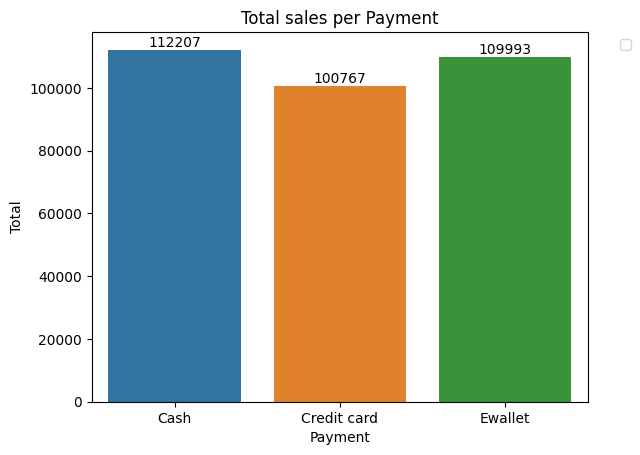

In [21]:
#We observe the total sales by payment
# Vemos las ventas totales por metodo de pago

Gender_Sold = df_sales[['Payment','Total']].groupby(by=['Payment']).sum().reset_index()

ax = sns.barplot (x='Payment', y='Total',data=Gender_Sold)
ax.set (xlabel='Payment',ylabel = 'Total')
ax.set_title('Total sales per Payment')

#Agregamos etiquetas a las barras
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}',(p.get_x()+p.get_width()/2, p.get_height()), ha='center', va='bottom')
    
plt.xticks(rotation=0)

#Acomodamos la leyenda
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')
plt.show()

En los tres graficos anteriores tratamos de ver la distribucion de las ventas de la tienda comparando algunos datos categoricos de importancia. A simple vista se ve que la distribucion de las ventas en las tres tiendas es parejo por el genero del cliente, por el tipo de cliente y por el tipo de pago del cliente. Estudiaremos mas en profundidad con el fin de encotrar si podemos detectar algun tipo de cliente o outliers que sea perjudicial para nuestro proyecto.<br>
In the previous three graphs, we tried to observe the distribution of store sales by comparing some important categorical data. At first glance, it appears that the distribution of sales in the three stores is fairly even across customer gender, customer type, and payment type. We will further study in depth to see if we can identify any specific customer types or outliers that may be detrimental to our project

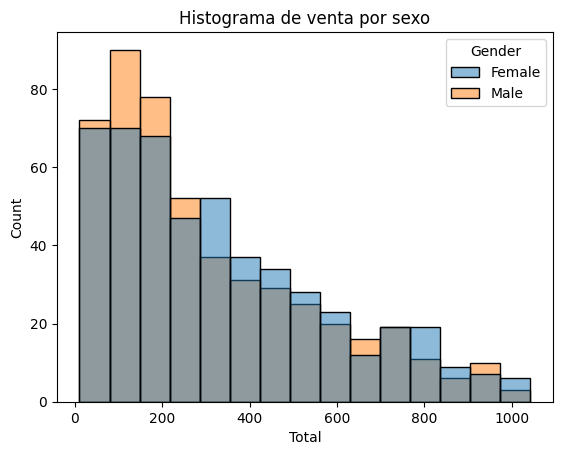

In [22]:
#Histogram of sales by gender
sns.histplot(data=df_sales,x='Total',hue='Gender')
plt.title('Histograma de venta por sexo')
plt.show()

Is there a peak sales schedule in the branches?<br>
Hay algun horario de pico de venta en las sucursales?

c:\Users\Rodrigo\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


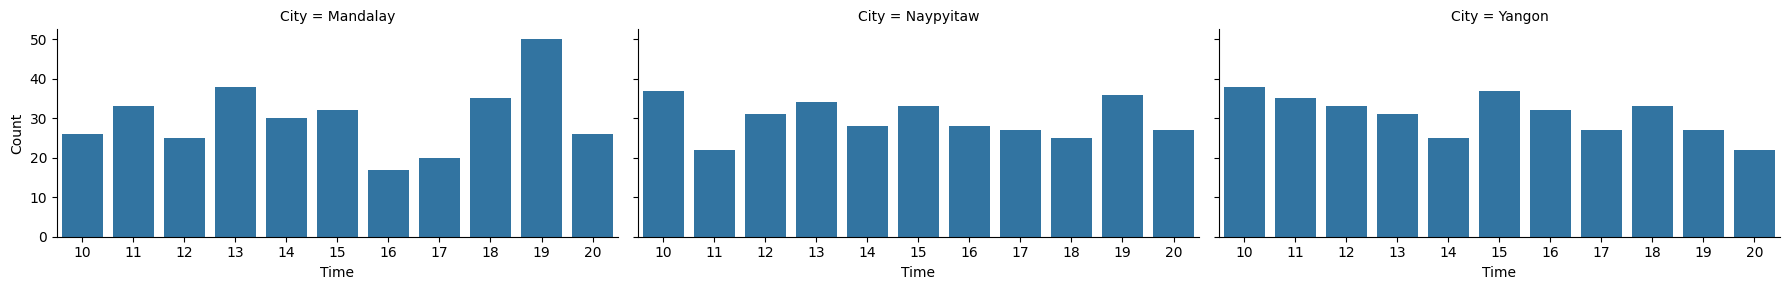

In [23]:
#Facetgrid
df_sales['Time']=pd.to_datetime(df_sales['Time'])
df_sales['Time']=df_sales['Time'].dt.hour

df1 = pd.DataFrame({'Count':df_sales.groupby(['City','Time']).size()})
df1
df1 =df1.reset_index()
df1.head(10)

df1 = pd.DataFrame({'Count':df_sales.groupby(['City','Time']).size()})
df1=df1.reset_index()
chart=sns.FacetGrid(df1,col='City', margin_titles=True,col_wrap=3,aspect=2, row_order=df1['City'].unique)
chart.map(sns.barplot,'Time','Count',)

We observe that while the distribution of sales between the cities of Naypyitaw and Yangon is quite even, it is not the case for Mandalay, which has a pronounced peak at 7 p.m.<br>
Vemos que si bien es bastante pareja la distribucion entre las ventas de las ciudades de Haypyitaw y yangon, no es asi para Mandalay que tien un pico marcado a las 19hs.

What is the sales distribution by city?<br>
Como es la distribucion de venta por ciudad?

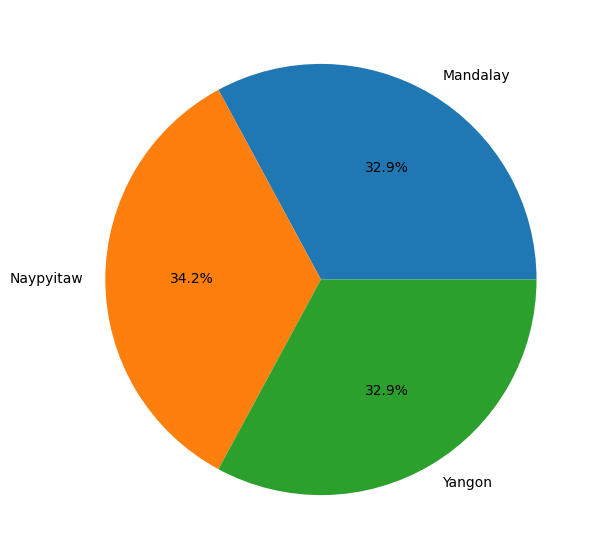

In [24]:
#Pie plot of total sales by region
# Pie plot region por ventas totas
# Agrupar los datos por región y sumar las unidades vendidas
grouped_data = df_sales.groupby('City')['Total'].sum()

# Crear la figura y el eje
fig, ax = plt.subplots(figsize=(10, 7))

# Generar el gráfico de pastel
ax.pie(grouped_data, labels=grouped_data.index, autopct='%1.1f%%')

# Mostrar el gráfico
plt.show()

We observe an even distribution of total sales across all branches.<br>
Vemos una distribucion pareja del total de ventas por sucursal


What type of product sells the most at each branch?<br>
Que tipo de producto se vende mas por sucursal?

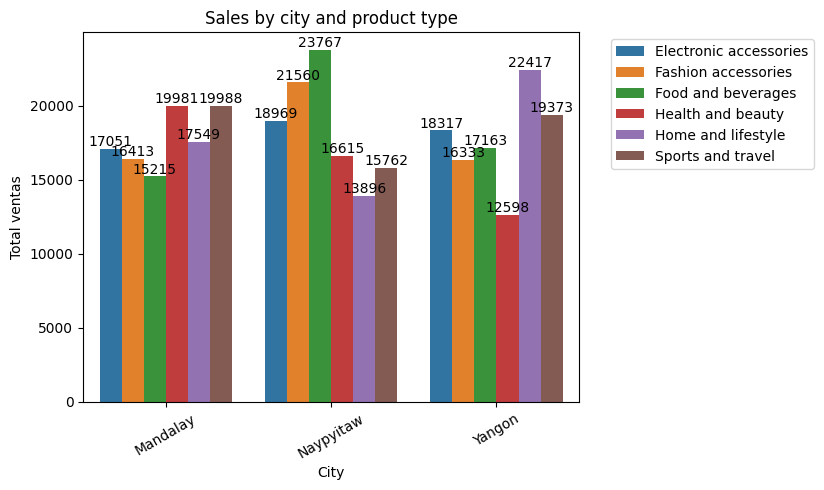

In [25]:
#Sales by city and product type
ventas = df_sales.groupby(['City', 'Product line'])['Total'].sum().reset_index()

ax = sns.barplot(x='City', y='Total', hue='Product line', data=ventas)
ax.set(xlabel='City', ylabel='Total ventas')
ax.set_title('Sales by city and product type')

# Agregar etiquetas a las barras
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

plt.xticks(rotation=30)

# Acomodar la leyenda
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

Gracias a este grafico vamos a poder idenficar por ciudad cual es el tipo de producto que mas ventas tuvo.<br>
Thanks to this graph, we will be able to identify, by city, the type of product that had the highest sales.

What distribution can we find in the total sales and quantities sold?<br>
Que distribucion podemos encontrar en los totales de ventas y cantidades vendidas?

<AxesSubplot:xlabel='Total', ylabel='Count'>

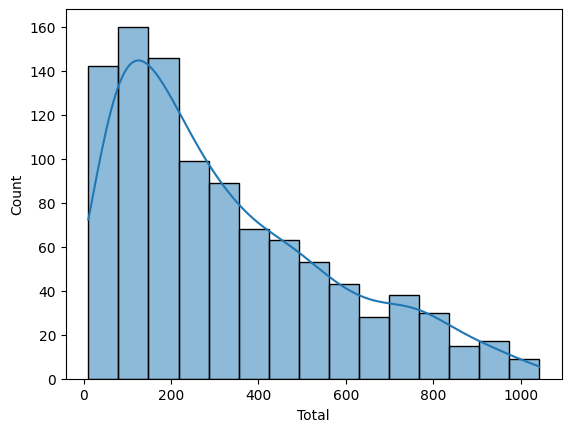

In [26]:
#Histogram of total sales
sns.histplot(df_sales.Total, kde=True)

We observe that the total sales are concentrated between 0 to 200.<br>
Vemos que el total por venta se concentra entre los 0 a 200.

<AxesSubplot:xlabel='Quantity', ylabel='Count'>

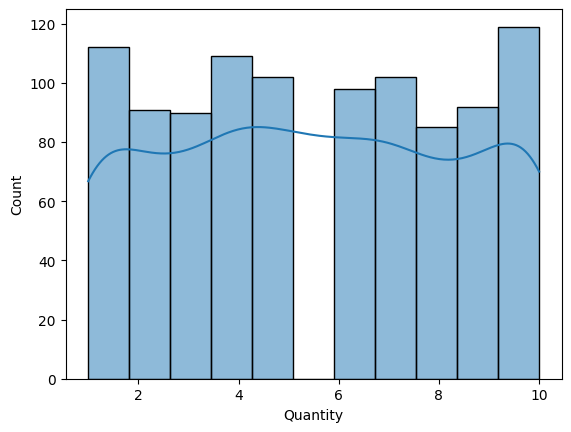

In [27]:
#Histogram of quiantity
sns.histplot(df_sales.Quantity, kde=True)

The quantity of products purchased is fairly evenly distributed.<br>
La cantidad de producto comprado se distribuye de manera bastante pareja.


Let's check if there are any outliers in our dataframe.<br>
Verificamos si existen valores atipicos en nustro dataframe

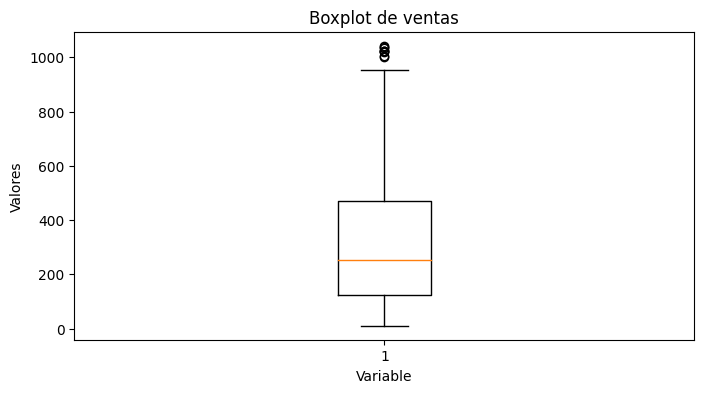

In [28]:
#Box plot 
fig,ax = plt.subplots(figsize=(8,4))
ax.boxplot(x=[df_sales['Total']])
ax.set_title('Boxplot de ventas')
ax.set_xlabel('Variable')
ax.set_ylabel('Valores')
plt.show()


Let's try to identify which branches these outliers belong to.<br>
Tratamos de identificar a que sucursales pertenecen estos outliers.

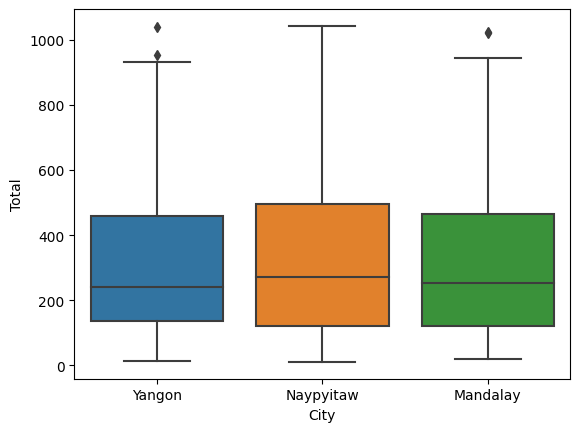

In [29]:
# Box plot for City and Total
ax = sns.boxplot(x="City", y="Total", data=df_sales)


Let's see if they are not errors and if these amounts are possible for purchases made by customers.<br>
Veremos si no se trata de un error o son montos posibles de compras realizadas por clientes.

In [33]:
Monto = 950  # Monto especifico
ciudad_especifica = 'Yangon'  # Ciudad específica que deseas filtrar

df_Day_Naypytaw = df_sales[(df_sales['Total'] > Monto) & (df_sales['City'] == ciudad_especifica)]
df_Day_Naypytaw

,Invoice ID,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Month
167,687-47-8271,Yangon,Normal,Male,Fashion accessories,98.98,10,49.490,1039.290,2019-02-08,16,Credit card,989.8,4.761905,49.490,8.7,2
429,325-77-6186,Yangon,Member,Female,Home and lifestyle,90.65,10,45.325,951.825,2019-03-08,10,Ewallet,906.5,4.761905,45.325,7.3,3


In [34]:
Monto = 950  # Monto especifico
ciudad_especifica = 'Mandalay'  # Ciudad específica que deseas filtrar

df_Day_Naypytaw = df_sales[(df_sales['Total'] > Monto) & (df_sales['City'] == ciudad_especifica)]
df_Day_Naypytaw

,Invoice ID,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Month
792,744-16-7898,Mandalay,Normal,Female,Home and lifestyle,97.37,10,48.685,1022.385,2019-01-15,13,Credit card,973.7,4.761905,48.685,4.9,1
996,303-96-2227,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.690,1022.490,2019-03-02,17,Ewallet,973.8,4.761905,48.690,4.4,3


Es pareja la distribucion de cantidad comprada vs el total de la compra?

<AxesSubplot:xlabel='Unit price', ylabel='Quantity'>

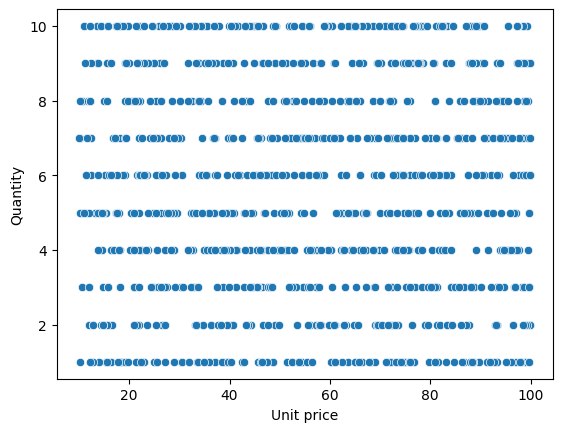

In [30]:
#Scarterplot
sns.scatterplot(data=df_sales, x="Unit price", y="Quantity")

Vemos una distribucion pareja en terminos de cantidad de unidades compradas con relacion a su precio. Este es un dato de interes debido a que de igual manera que productos de poco valor se venden los productos caros.<br>
We observe a fairly even distribution in terms of the quantity of units purchased relative to their price. This is an interesting finding because it shows that both low-value and high-value products are being sold